## Importing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Import the Data
student_data = pd.read_csv('student-mat.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'student-mat.csv'

In [ ]:
# Initial Data Check: Size
student_data.size

13825

In [ ]:
# Initial Data Check: : Data Types
student_data.dtypes

,0
school,object
sex,object
age,float64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [ ]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,1.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,NaN,NaN,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,1.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,0.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10


In [ ]:
# G3 is target, since it is final grade
X = student_data.drop('G3', axis=1)
y = student_data['G3']

In [ ]:
# Split the Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
181,GP,M,16.0,U,GT3,T,3,3,services,other,...,2,3,1,2,3,0.0,0.0,2.0,12,13
194,GP,M,16.0,U,GT3,T,2,3,other,other,...,3,3,1,1,3,0.0,0.0,0.0,13,14
173,GP,F,16.0,U,GT3,T,1,3,at_home,services,...,3,5,1,1,3,0.0,0.0,0.0,8,7
63,GP,F,16.0,U,GT3,T,4,3,teacher,health,...,4,4,2,4,4,0.0,0.0,2.0,10,9
253,GP,M,16.0,R,GT3,T,2,1,other,other,...,3,2,1,3,3,0.0,0.0,0.0,8,9


## Data Exploration

In [ ]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
181,GP,M,16.0,U,GT3,T,3,3,services,other,...,2,3,1,2,3,0.0,0.0,2.0,12,13
194,GP,M,16.0,U,GT3,T,2,3,other,other,...,3,3,1,1,3,0.0,0.0,0.0,13,14
173,GP,F,16.0,U,GT3,T,1,3,at_home,services,...,3,5,1,1,3,0.0,0.0,0.0,8,7
63,GP,F,16.0,U,GT3,T,4,3,teacher,health,...,4,4,2,4,4,0.0,0.0,2.0,10,9
253,GP,M,16.0,R,GT3,T,2,1,other,other,...,3,2,1,3,3,0.0,0.0,0.0,8,9


In [ ]:
# Attributes
X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
count,305.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,305.000000,305.000000,305.000000,316.000000,316.000000
mean,16.747541,2.734177,2.544304,1.430380,2.047468,0.335443,3.943038,3.218354,3.161392,1.500000,2.344937,3.518987,0.704918,0.704918,4.488525,10.933544,10.651899
std,1.274188,1.080375,1.078476,0.688842,0.836258,0.735588,0.885464,1.020323,1.119480,0.903257,1.296395,1.410714,1.373435,1.373435,5.824238,3.216823,3.755930
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       316 non-null    object 
 1   sex          316 non-null    object 
 2   age          305 non-null    float64
 3   address      316 non-null    object 
 4   famsize      316 non-null    object 
 5   Pstatus      316 non-null    object 
 6   Medu         316 non-null    int64  
 7   Fedu         316 non-null    int64  
 8   Mjob         316 non-null    object 
 9   Fjob         316 non-null    object 
 10  reason       316 non-null    object 
 11  guardian     316 non-null    object 
 12  traveltime   316 non-null    int64  
 13  studytime    316 non-null    int64  
 14  failures     316 non-null    int64  
 15  schoolsup    316 non-null    object 
 16  famsup       316 non-null    object 
 17  paid         316 non-null    object 
 18  activities   316 non-null    object 
 19  nursery    

In [ ]:
X_train.ndim

2

In [ ]:
X_train.shape

(316, 34)

In [ ]:
X_train.size

10744

In [ ]:
# Visualizations:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# List of all numeric columns
numeric_cols = ['age', 'failures', 'absences_G1',
                'absences_G2', 'absences_G3', 'G1', 'G2', 'G3']

ordinal_cols = ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='failures', ylabel='age'>,
        <Axes: xlabel='absences_G1', ylabel='age'>,
        <Axes: xlabel='absences_G2', ylabel='age'>,
        <Axes: xlabel='absences_G3', ylabel='age'>,
        <Axes: xlabel='G1', ylabel='age'>,
        <Axes: xlabel='G2', ylabel='age'>,
        <Axes: xlabel='G3', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='failures'>,
        <Axes: xlabel='failures', ylabel='failures'>,
        <Axes: xlabel='absences_G1', ylabel='failures'>,
        <Axes: xlabel='absences_G2', ylabel='failures'>,
        <Axes: xlabel='absences_G3', ylabel='failures'>,
        <Axes: xlabel='G1', ylabel='failures'>,
        <Axes: xlabel='G2', ylabel='failures'>,
        <Axes: xlabel='G3', ylabel='failures'>],
       [<Axes: xlabel='age', ylabel='absences_G1'>,
        <Axes: xlabel='failures', ylabel='absences_G1'>,
        <Axes: xlabel='absences_G1', ylabel='absences_G1'>,
        <Axes: xlabel='absences_G

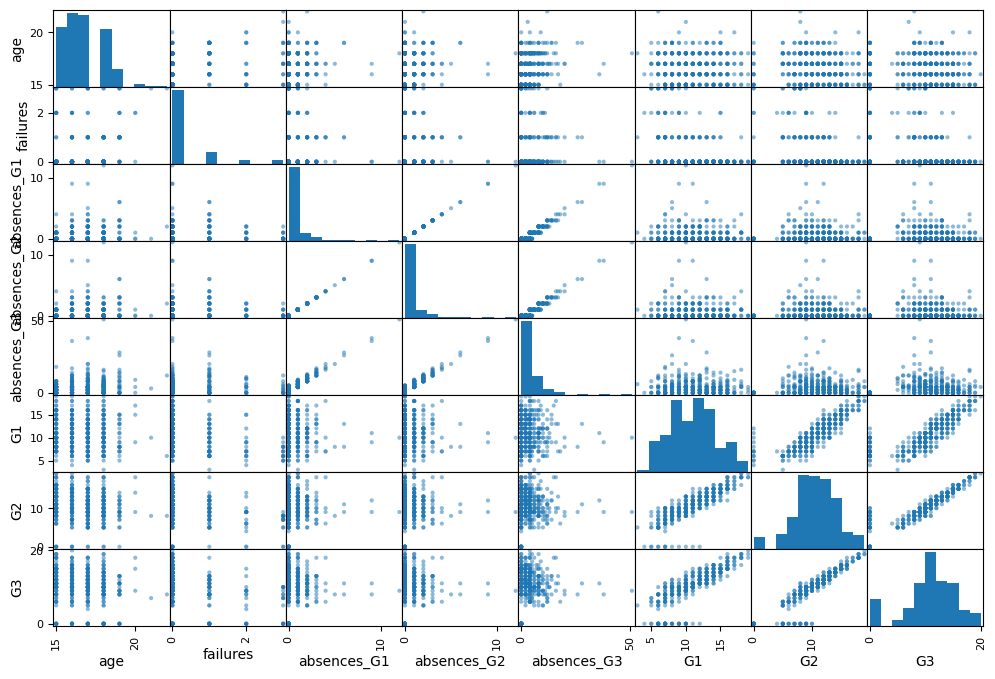

In [ ]:
pd.plotting.scatter_matrix(student_data[numeric_cols], figsize=(12, 8))

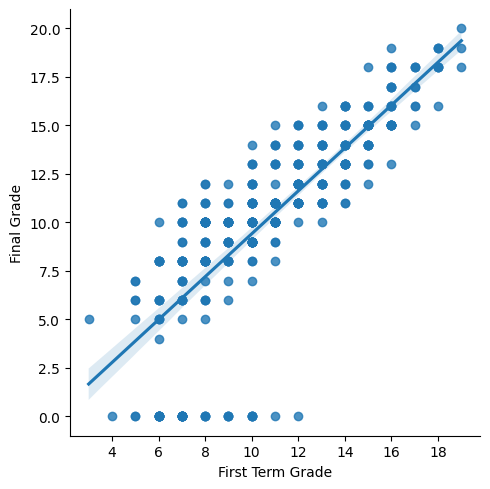

In [ ]:
# G1 relationship to G3
# Grade Zero is Lowest and Grade 20 is highest
g1_plot = sns.lmplot(x = "G1", y = "G3",
           data = student_data)

g1_plot.set(xlabel='First Term Grade', ylabel='Final Grade')
plt.show()

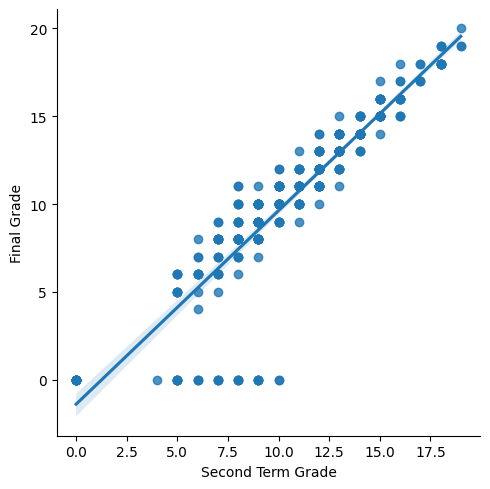

In [ ]:
# G1 relationship to G3
# Grade Zero is Lowest and Grade 20 is highest
g2_plot = sns.lmplot(x = "G2", y = "G3",
           data = student_data)

g2_plot.set(xlabel='Second Term Grade', ylabel='Final Grade')
plt.show()

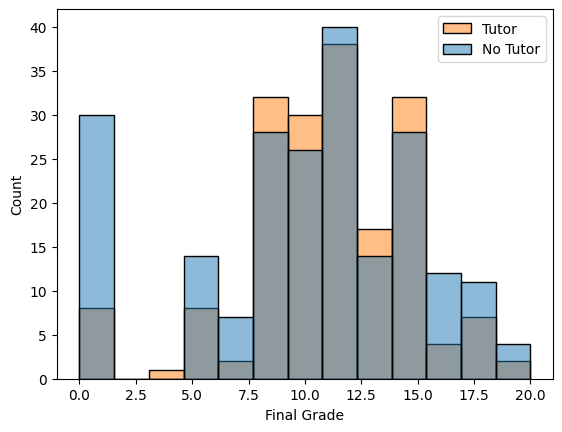

In [ ]:
paid_plot = sns.histplot(data=student_data, x="G3", hue="paid")

paid_plot.set(xlabel='Final Grade')
paid_plot.legend(['Tutor', 'No Tutor'])
plt.show()

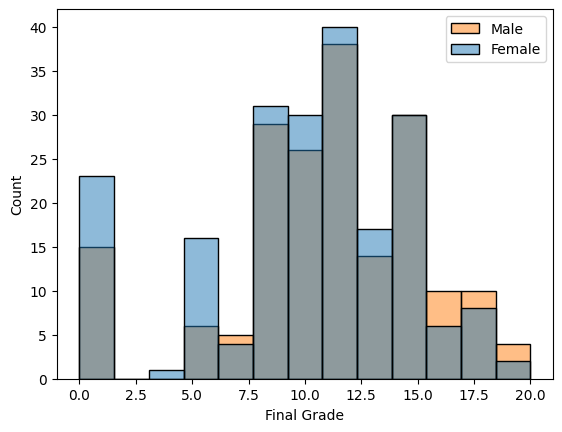

In [ ]:
sex_plot = sns.histplot(data=student_data, x="G3", hue="sex")

sex_plot.set(xlabel='Final Grade')
sex_plot.legend(['Male', 'Female'])
plt.show()

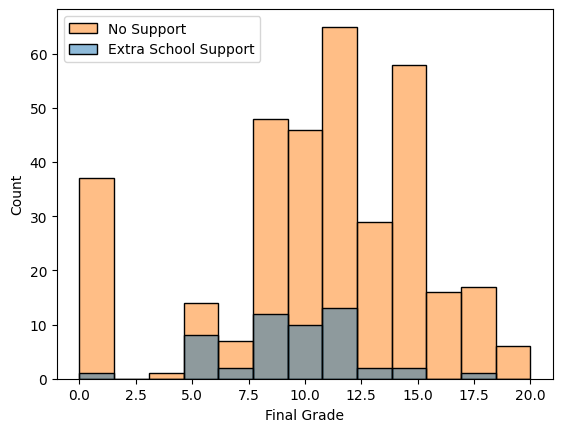

In [ ]:
school_supportplot = sns.histplot(data=student_data, x="G3", hue="schoolsup")

school_supportplot.set(xlabel='Final Grade')
school_supportplot.legend(['No Support', 'Extra School Support'])
plt.show()

<Axes: xlabel='G3', ylabel='absences_G3'>

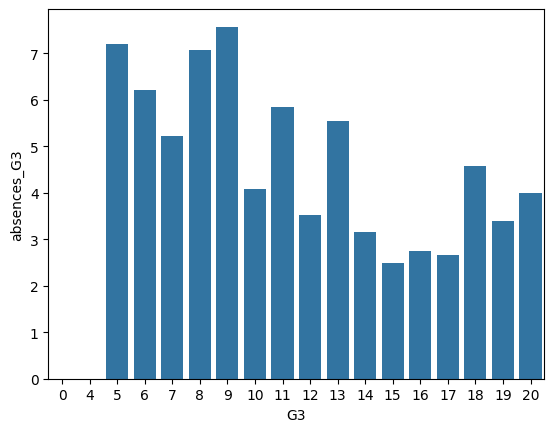

In [ ]:
sns.barplot(data=student_data, x="G3", y="absences_G3", errorbar=None)

In [ ]:
# 3) Correlations table
correlations = student_data[numeric_cols].corr()
correlations['G3'].sort_values(ascending=False)

,G3
G3,1.000000
G2,0.904868
G1,0.801468
absences_G3,0.067294
absences_G1,0.012485
absences_G2,0.012485
age,-0.152762
failures,-0.360415


<Axes: >

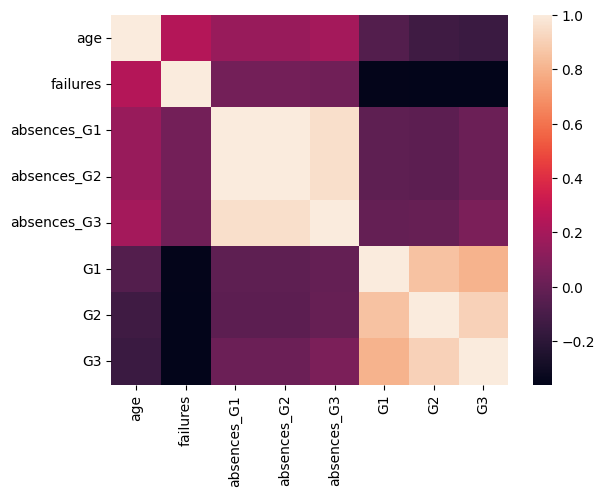

In [ ]:
# Correlations heatmap
corr_df = pd.DataFrame(correlations)
sns.heatmap(corr_df)

In [ ]:
# Correlation ordinal data
from scipy.stats import spearmanr

ordinal_corr = {}
for col in ordinal_cols:
    corr, _ = spearmanr(student_data[col], student_data['G3'])
    ordinal_corr[col] = corr

ordinal_corr["Mother's Education"] = ordinal_corr.pop('Medu')
ordinal_corr["Fathers's Education"] = ordinal_corr.pop('Fedu')
ordinal_corr['Commute Time'] = ordinal_corr.pop('traveltime')
ordinal_corr['Study Time'] = ordinal_corr.pop('studytime')
ordinal_corr['Home Life'] = ordinal_corr.pop('famrel')
ordinal_corr['Free Time'] = ordinal_corr.pop('freetime')
ordinal_corr['Party Life'] = ordinal_corr.pop('goout')
ordinal_corr['Alcohol Consumption (Week)'] = ordinal_corr.pop('Dalc')
ordinal_corr['Alcohol Consumption (Weekend)'] = ordinal_corr.pop('Walc')
ordinal_corr['Health'] = ordinal_corr.pop('health')


ordinal_corr

{"Mother's Education": 0.2250358528745645,
 "Fathers's Education": 0.17004900082627797,
 'Commute Time': -0.12053038660352437,
 'Study Time': 0.10516968678133246,
 'Home Life': 0.05497687081409259,
 'Free Time': -0.004993740953811285,
 'Party Life': -0.1661187496045088,
 'Alcohol Consumption (Week)': -0.12094448004589974,
 'Alcohol Consumption (Weekend)': -0.10445859969861528,
 'Health': -0.047789506549450154}

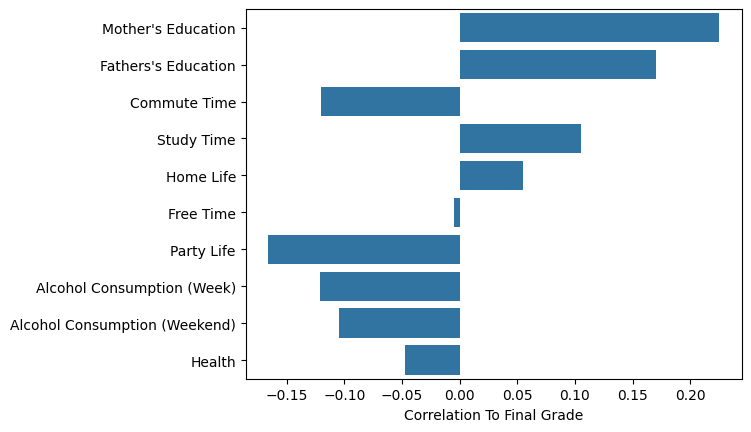

In [ ]:
# Plot of ordinal correlations
corr_barplot = sns.barplot(x=list(ordinal_corr.values()), y=list(ordinal_corr.keys()), orient="h")

corr_barplot.set(xlabel='Correlation To Final Grade')
plt.show()

## Data Pipeline

In [ ]:
# List of Features
numeric_columns = ['failures', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2', ]
categorical_columns= ['sex', 'paid']
ordinal_columns = ['Medu', 'Fedu', 'goout']

In [ ]:
# Custom Transformer For Data Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class FinalProjectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_grades=True):
        self.drop_grades = drop_grades

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['absences_sum'] = X.iloc[:, 0:3].sum(axis=1)
        X = X.drop(['absences_G1', 'absences_G2', 'absences_G3'], axis=1)
        if self.drop_grades:
          X = X.drop([ 'G1',  'G2'], axis=1)
          return X
        else:
          return X

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Pipeline with G1, G2 columns
numeric_pipeline_with_grades = make_pipeline(
    SimpleImputer(strategy='mean').set_output(transform="pandas"),
    FinalProjectTransformer(drop_grades=False),
    StandardScaler()
)

# Pipeline without G1, G2 columns
numeric_pipeline_without_grades = make_pipeline(
    SimpleImputer(strategy='mean').set_output(transform="pandas"),
    FinalProjectTransformer(drop_grades=True),
    StandardScaler()
)

In [ ]:
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first', sparse_output=False)
)

In [ ]:
ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder()
)

In [ ]:
# create full pipeline
column_transformer_with_grades = ColumnTransformer([
        ("num", numeric_pipeline_with_grades, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
        ("ord", ordinal_pipeline, ordinal_columns),
    ])


column_transformer_without_grades = ColumnTransformer([
        ("num", numeric_pipeline_without_grades, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
        ("ord", ordinal_pipeline, ordinal_columns),
    ])

In [ ]:
X_train_transformed_with_grades = column_transformer_with_grades.fit_transform(X_train)

In [ ]:
X_train_transformed_without_grades = column_transformer_without_grades.fit_transform(X_train)

## Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso

In [ ]:
# Initialize the Models
lin_reg = LinearRegression()
svm_reg = SVR()
lasso_reg = Lasso()

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-Validation

cv_scores_lin_reg_with_grades = -cross_val_score(lin_reg, X_train_transformed_with_grades, y_train, cv=3, scoring='neg_root_mean_squared_error')
cv_scores_lin_reg_without_grades = -cross_val_score(lin_reg, X_train_transformed_without_grades, y_train, cv=3, scoring='neg_root_mean_squared_error')

cv_scores_svm_with_grades = -cross_val_score(svm_reg, X_train_transformed_with_grades, y_train, cv=3, scoring='neg_root_mean_squared_error')
cv_scores_svm_without_grades = -cross_val_score(svm_reg, X_train_transformed_without_grades, y_train, cv=3, scoring='neg_root_mean_squared_error')

cv_scores_lasso_with_grades = -cross_val_score(lasso_reg, X_train_transformed_with_grades, y_train, cv=3, scoring='neg_root_mean_squared_error')
cv_scores_lasso_without_grades = -cross_val_score(lasso_reg, X_train_transformed_without_grades, y_train, cv=3, scoring='neg_root_mean_squared_error')

In [ ]:
rmse_lin_reg_with_grades = cv_scores_lin_reg_with_grades.mean()
rmse_lin_reg_without_grades = cv_scores_lin_reg_without_grades.mean()

rmse_svm_with_grades = cv_scores_svm_with_grades.mean()
rmse_svm_without_grades =  cv_scores_svm_without_grades.mean()

rmse_lasso_with_grades = cv_scores_lasso_with_grades.mean()
rmse_lasso_without_grades = cv_scores_lasso_without_grades.mean()

In [ ]:
rmse_lin_reg_with_grades, rmse_lin_reg_without_grades

(1.876691430257024, 4.3070679144408865)

In [ ]:
rmse_svm_with_grades, rmse_svm_without_grades

(2.3614527119861366, 4.286230705614144)

In [ ]:
rmse_lasso_with_grades, rmse_lasso_without_grades

(2.169051437265221, 4.386455909382055)

In [ ]:
mean_rmse_scores = {
    'RMSE (With Terms)': [rmse_lin_reg_with_grades, rmse_lasso_with_grades, rmse_svm_with_grades],
    'RMSE (Without Terms)': [rmse_lin_reg_without_grades, rmse_svm_without_grades, rmse_svm_without_grades]
}

pd.DataFrame(mean_rmse_scores, index=['Linear Regression', 'Lasso Regression', 'SVM'])

,RMSE (With Terms),RMSE (Without Terms)
Linear Regression,1.876691,4.307068
Lasso Regression,2.169051,4.286231
SVM,2.361453,4.286231


## Fine Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter Grid

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Initialize Grid Search
grid_search = GridSearchCV(svm_reg, param_grid, cv=3,
                               scoring='neg_root_mean_squared_error')


grid_search2 = GridSearchCV(svm_reg, param_grid, cv=3,
                               scoring='neg_root_mean_squared_error')

In [ ]:
# Fit Grid Search
grid_search_with_grades = grid_search.fit(X_train_transformed_with_grades, y_train)

In [ ]:
grid_search_without_grades = grid_search2.fit(X_train_transformed_without_grades, y_train)

In [ ]:
# Best Parameters

best_params_with_grades = grid_search_with_grades.best_params_
print(best_params_with_grades)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
best_params_without_grades = grid_search_without_grades.best_params_
best_params_without_grades

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
#  Best Score

grid_search_with_grades.best_score_, grid_search_without_grades.best_score_

(-1.9273444213484214, -4.27668674312324)

In [ ]:
# Dataframe of each model's RMSE
mean_rmse_scores = {
    'RMSE (With Terms)': [rmse_lin_reg_with_grades, rmse_lasso_with_grades, rmse_svm_with_grades, -grid_search_with_grades.best_score_],
    'RMSE (Without Terms)': [rmse_lin_reg_without_grades, rmse_svm_without_grades, rmse_svm_without_grades, -grid_search_without_grades.best_score_]
}

pd.DataFrame(mean_rmse_scores, index=['Linear Regression', 'Lasso Regression', 'SVM', 'Tuned SVM'])

,RMSE (With Terms),RMSE (Without Terms)
Linear Regression,1.876691,4.307068
Lasso Regression,2.169051,4.286231
SVM,2.361453,4.286231
Tuned SVM,1.927344,4.276687


## Evaluation

In [ ]:
lin_reg1 = LinearRegression()
lin_reg2 = LinearRegression()

In [ ]:
# Fit Best Model

lin_reg_model_with_grades = lin_reg1.fit(X_train_transformed_with_grades, y_train)
lin_reg_model_witout_grades = lin_reg2.fit(X_train_transformed_without_grades, y_train)

In [ ]:
# Transform the Test Set
X_test_transformed_without_grades = column_transformer_without_grades.transform(X_test)
X_test_transformed_with_grades = column_transformer_with_grades.transform(X_test)

In [ ]:

final_predictions_without_grades = lin_reg_model_witout_grades.predict(X_test_transformed_without_grades)
final_predictions_with_grades = lin_reg_model_with_grades.predict(X_test_transformed_with_grades)

In [ ]:
# Evaluate Performance
from sklearn.metrics import mean_squared_error, r2_score

rmse_with_grades = round(np.sqrt(mean_squared_error(y_test, final_predictions_with_grades)), 2)
r2_with_grades = r2_score(y_test, final_predictions_with_grades)

rmse_without_grades = round(np.sqrt(mean_squared_error(y_test, final_predictions_without_grades)), 2)
r2_without_grades = r2_score(y_test, final_predictions_without_grades)

In [ ]:
mean_rmse_scores = {
    'RMSE (With Terms)': [rmse_lin_reg_with_grades, rmse_lasso_with_grades,
                          rmse_svm_with_grades, grid_search_with_grades.best_score_, rmse_with_grades],
    'RMSE (Without Terms)': [rmse_lin_reg_without_grades, rmse_svm_without_grades,
                             rmse_svm_without_grades, grid_search_without_grades.best_score_, rmse_without_grades]
}

pd.DataFrame(mean_rmse_scores, index=['Linear Regression', 'Lasso Regression', 'SVM', 'Tuned SVM', 'Final Linear Model'])

,RMSE (With Terms),RMSE (Without Terms)
Linear Regression,1.876691,4.307068
Lasso Regression,2.169051,4.286231
SVM,2.361453,4.286231
Tuned SVM,-1.927344,-4.276687
Final Linear Model,2.180000,4.250000
